## Imports

In [93]:
%pip install kmodes scikit-learn-extra 



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import PCA

# Non-Hierarchical Clustering Models
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.manifold import Isomap
import umap
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [95]:
path = '../datasets/FoodInsecurity_Hispanic_Demographics_Tone_Preferences_Dataset.xlsx'

In [96]:
df = pd.read_excel(path)

In [97]:
tones = df[['sample_1','sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7','sample_8']]

In [98]:
tones_list = tones.columns.tolist()

In [99]:
encoder = LabelEncoder()

for question in tones_list:
    tones.loc[:, question] = encoder.fit_transform(tones[question])
tones.head(3)

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
0,2,3,0,2,1,1,2,1
1,1,3,0,3,3,1,1,2
2,1,1,3,3,0,0,0,3


In [100]:
scaler = StandardScaler()
tones_scaled = scaler.fit_transform(tones)

In [101]:
tones_encoded = pd.get_dummies(tones)

In [102]:
# tones_encoded.to_excel('tones_encoded.xlsx', index=False)

## KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 237.0
Run 1, iteration: 2/100, moves: 2, cost: 237.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 238.0
Run 2, iteration: 2/100, moves: 5, cost: 233.0
Run 2, iteration: 3/100, moves: 2, cost: 233.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7, cost: 240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13, cost: 235.0
Run 4, iteration: 2/100, moves: 1, cost: 235.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 8, cost: 236.0
Run 5, iteration: 2/100, moves: 1, cost: 236.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, mo

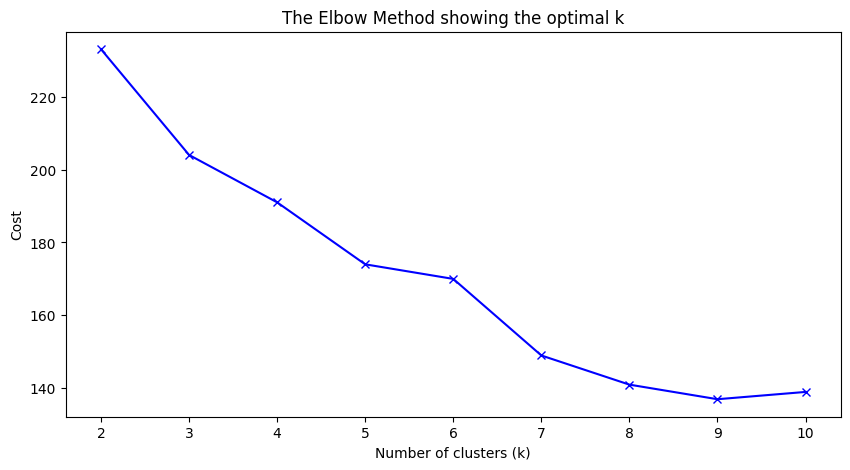

In [103]:
# Elbow method and silhouette scores for KModes
cost = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1, random_state=42)
    clusters = kmodes.fit_predict(tones)
    cost.append(kmodes.cost_)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [104]:
# Create an instance of KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init=50, max_iter=500)

# Fit the KMeans model to the tones_encoded dataset
kmeans.fit(tones_encoded)

KMeans(max_iter=500, n_clusters=6, n_init=50, random_state=42)

## Principle Component Analysis

In [105]:
pca = PCA(n_components=2)
tones_pca = pca.fit_transform(tones_encoded)

# Access the principal components
principal_components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

### Elbow Method

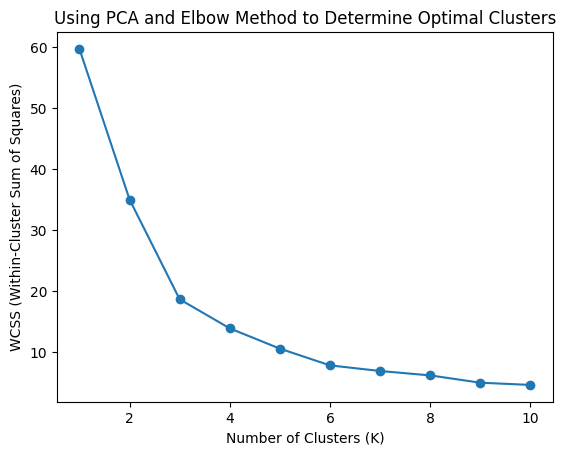

In [106]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(tones_pca)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Using PCA and Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

### Silhouette Score

For n_clusters = 2, the average silhouette score is: 0.39
For n_clusters = 2, the Calinski-Harabasz index is: 33.88
For n_clusters = 2, the Davies-Bouldin score is: 1.04


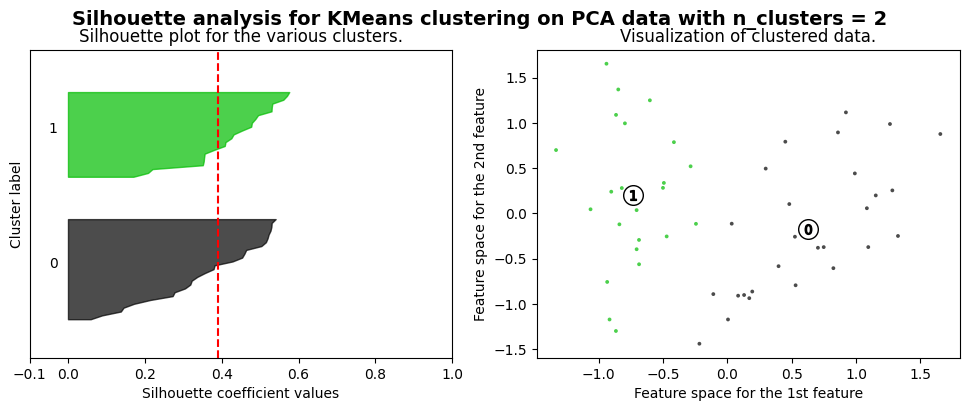

For n_clusters = 3, the average silhouette score is: 0.43
For n_clusters = 3, the Calinski-Harabasz index is: 51.79
For n_clusters = 3, the Davies-Bouldin score is: 0.77


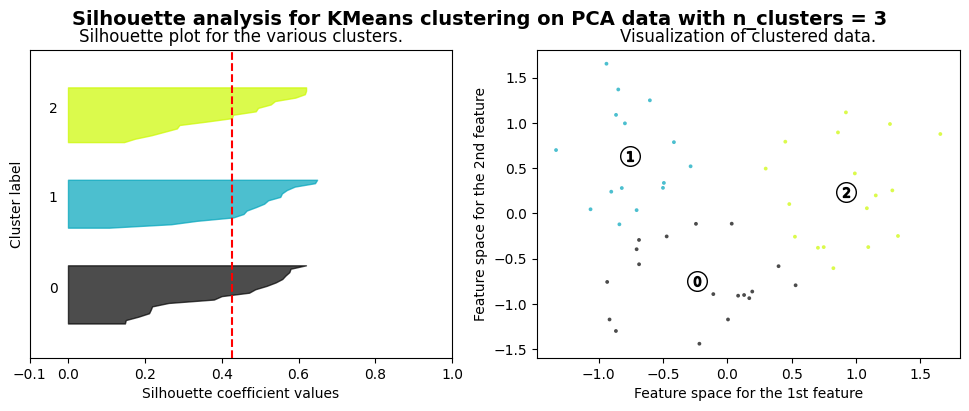

For n_clusters = 4, the average silhouette score is: 0.41
For n_clusters = 4, the Calinski-Harabasz index is: 50.69
For n_clusters = 4, the Davies-Bouldin score is: 0.75


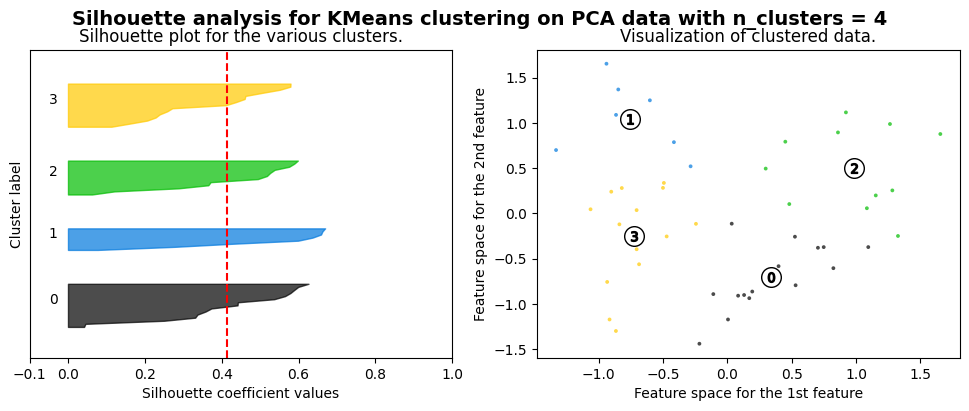

For n_clusters = 5, the average silhouette score is: 0.41
For n_clusters = 5, the Calinski-Harabasz index is: 52.49
For n_clusters = 5, the Davies-Bouldin score is: 0.70


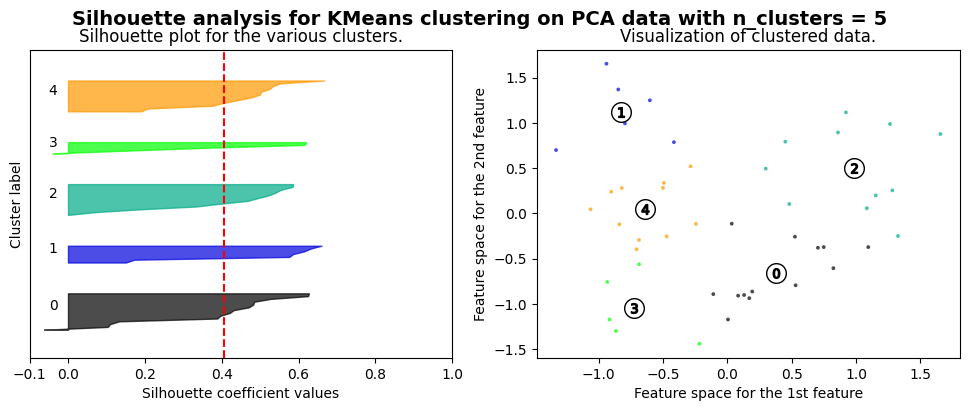

For n_clusters = 6, the average silhouette score is: 0.41
For n_clusters = 6, the Calinski-Harabasz index is: 58.62
For n_clusters = 6, the Davies-Bouldin score is: 0.75


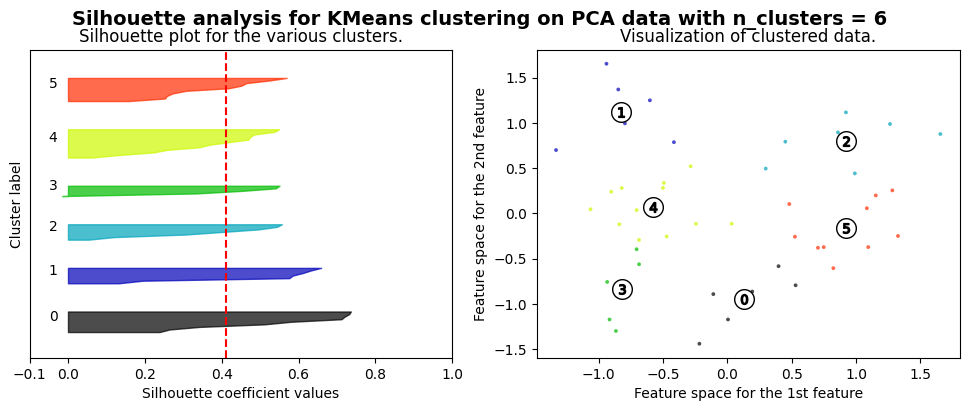

In [182]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Assuming tones_pca is your PCA transformed data

# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(tones_pca) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(tones_pca)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(tones_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.2f}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tones_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(tones_pca[:, 0], tones_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on PCA data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Compute and print the Calinski-Harabasz index and Davies-Bouldin score
    calinski_harabasz = calinski_harabasz_score(tones_pca, cluster_labels)
    davies_bouldin = davies_bouldin_score(tones_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the Calinski-Harabasz index is: {calinski_harabasz:.2f}")
    print(f"For n_clusters = {n_clusters}, the Davies-Bouldin score is: {davies_bouldin:.2f}")

    plt.show()


### Initialization & Metrics

In [195]:
# Create an instance of the KMeans model
kmeans = KMeans(n_clusters=3, n_init='auto')
cluster_labels_pca = kmeans.fit_predict(tones_pca)

### Cluster Label Assignment

In [196]:
pca_df = df.copy()
pca_df['Cluster'] = cluster_labels_pca

In [197]:
pca_df.head(2)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,states,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,Cluster
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,indiana,Persuasive,Simplier,Empathetic,Persuasive,Original,Original,Persuasive,Original,0
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,illinois,Original,Simplier,Empathetic,Simplier,Simplier,Original,Original,Persuasive,0


In [198]:
id_vars = pca_df.columns.difference(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'])

In [199]:
# Melt dataframe
pca_graphs = pd.melt(pca_df, id_vars=id_vars, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],value_name='tone')
pca_graphs.drop('variable',axis=1, inplace=True)

In [200]:
# List of columns to plot
columns_to_plot = ['age', 'disability', 'education', 'employment', 'ethnicity', 'gender', 'income', 'language', 'marital_status', 'race', 'tone']

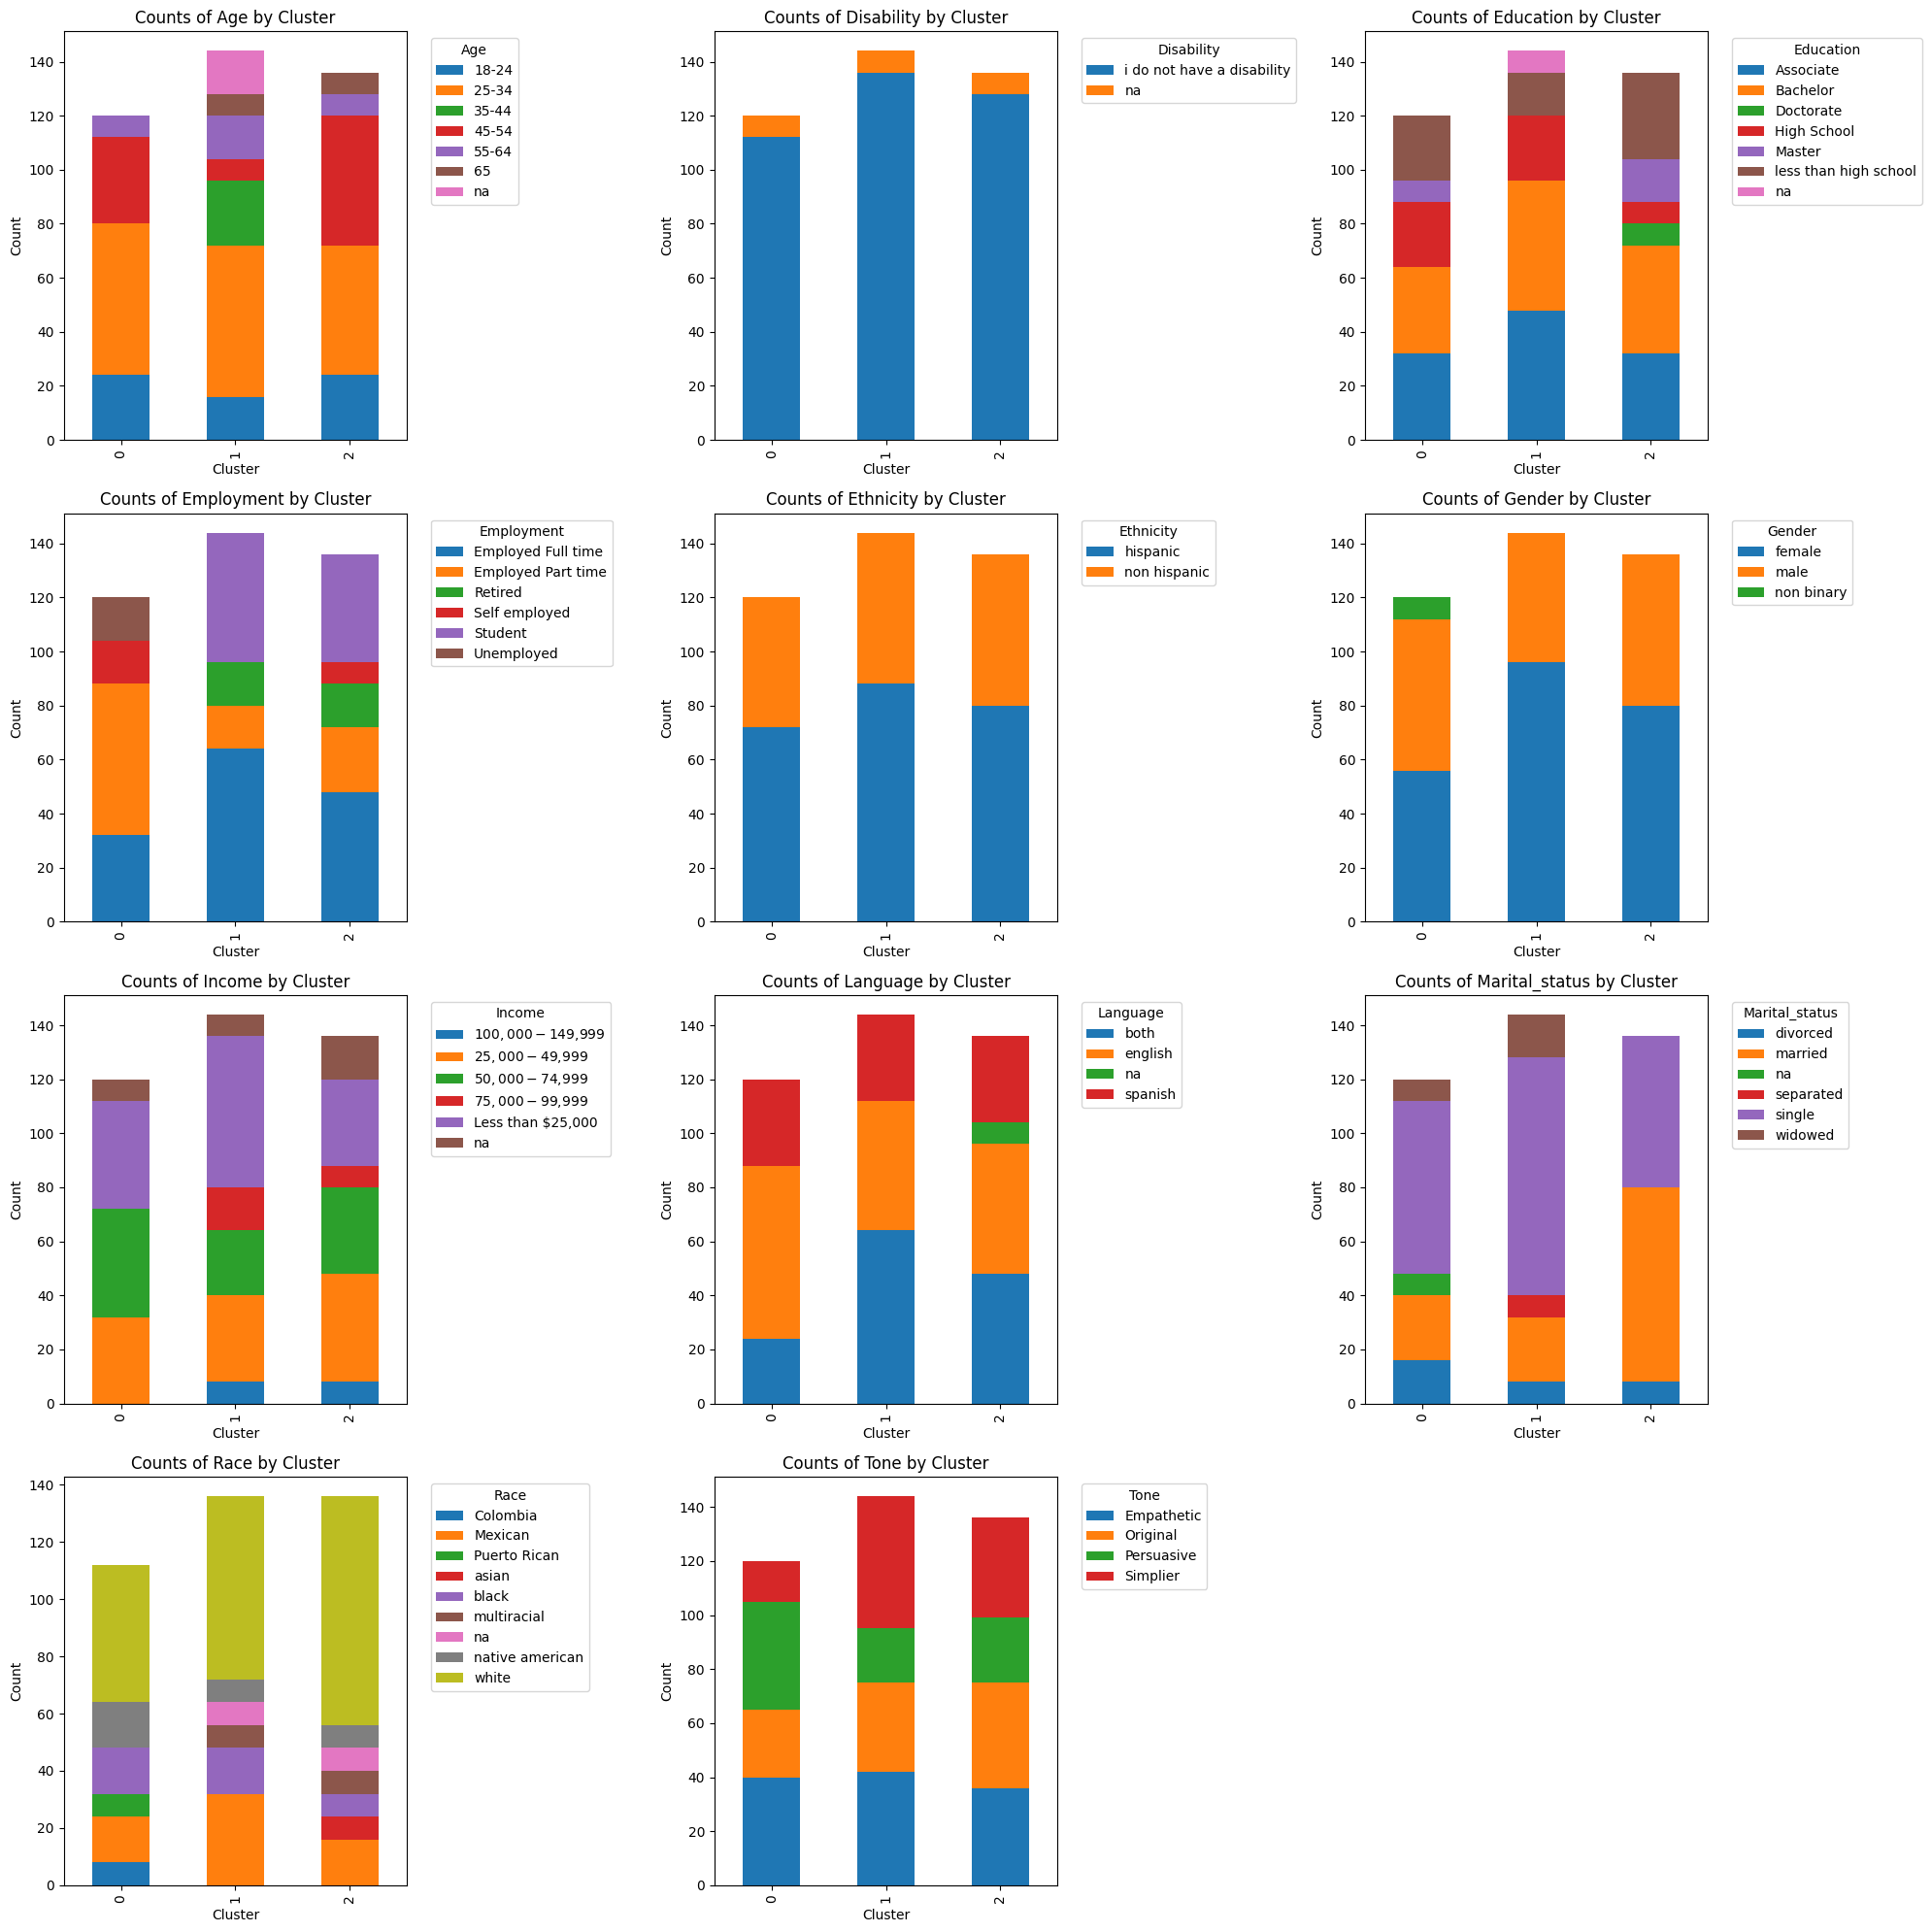

In [201]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    cluster_option_counts = pca_graphs.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = cluster_option_counts.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of {column.capitalize()} by Cluster')
    ax.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

In [116]:
# pca_graphs.to_excel('../datasets/pca-tone-clusters.xlsx', index=False )

## TSNE

In [117]:
tsne = TSNE(n_components=2)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(tones_encoded) # type: ignore

### Elbow Method

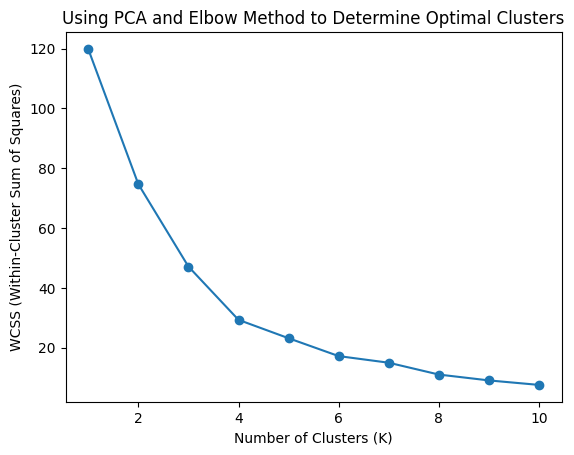

In [118]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_tsne)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Using PCA and Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

### Silhouette

For n_clusters = 2, the average silhouette score is: 0.3409793972969055
For n_clusters = 3, the average silhouette score is: 0.3613278269767761
For n_clusters = 4, the average silhouette score is: 0.39002594351768494
For n_clusters = 5, the average silhouette score is: 0.3824940621852875
For n_clusters = 6, the average silhouette score is: 0.3879266679286957
For n_clusters = 7, the average silhouette score is: 0.3642674684524536
For n_clusters = 8, the average silhouette score is: 0.4317730665206909
For n_clusters = 9, the average silhouette score is: 0.4499904215335846
For n_clusters = 10, the average silhouette score is: 0.4529574513435364


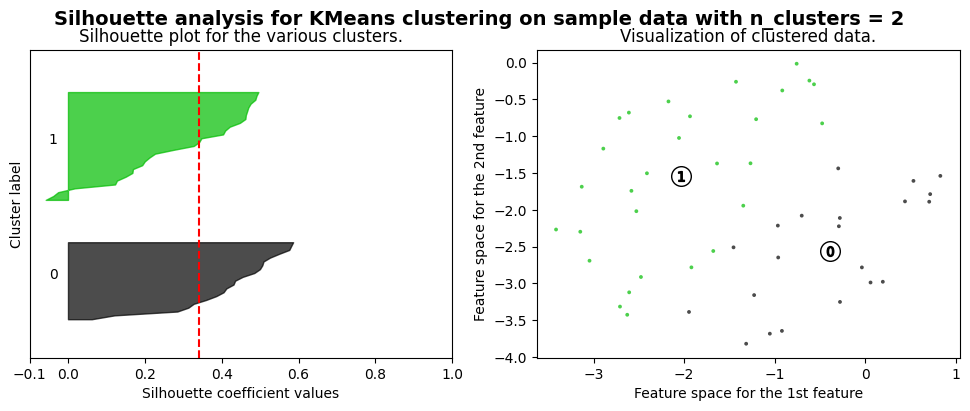

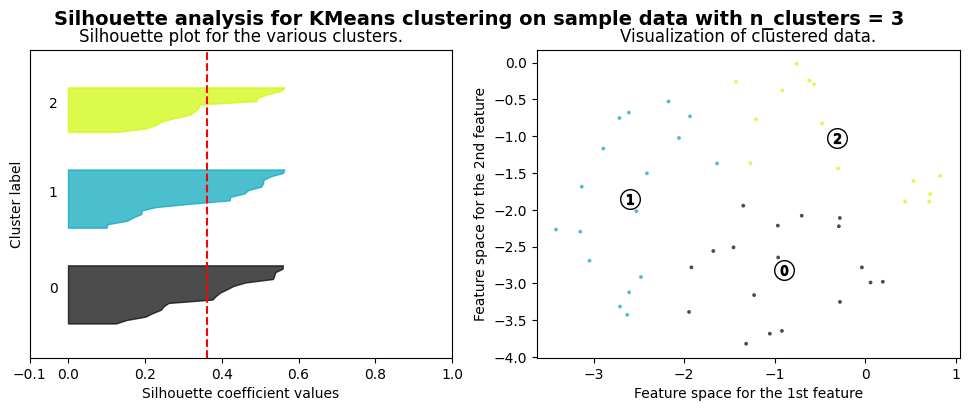

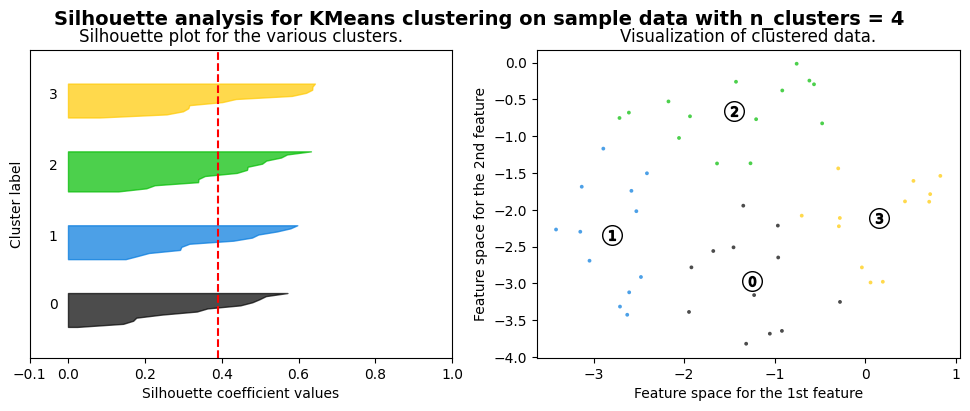

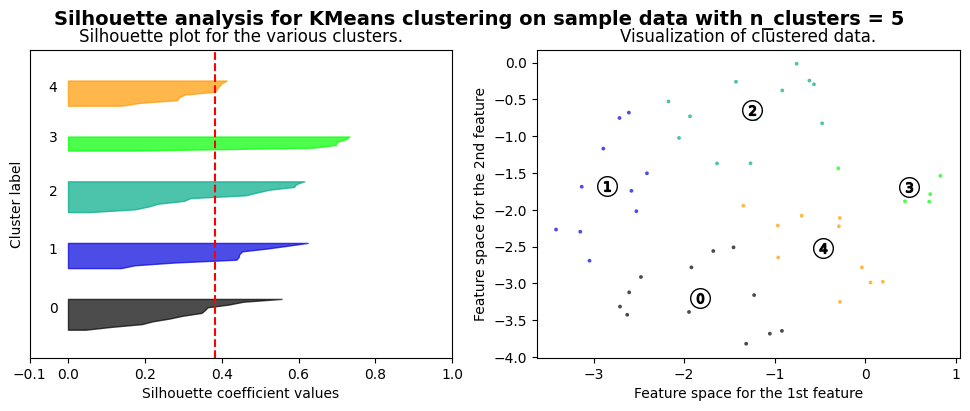

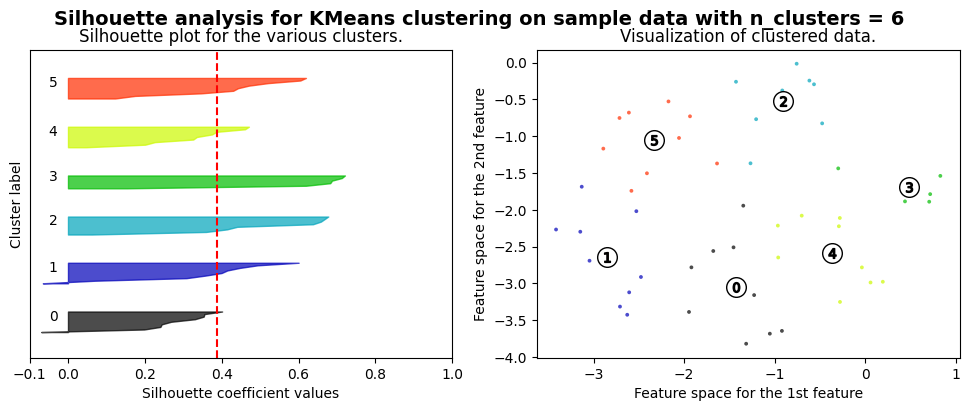

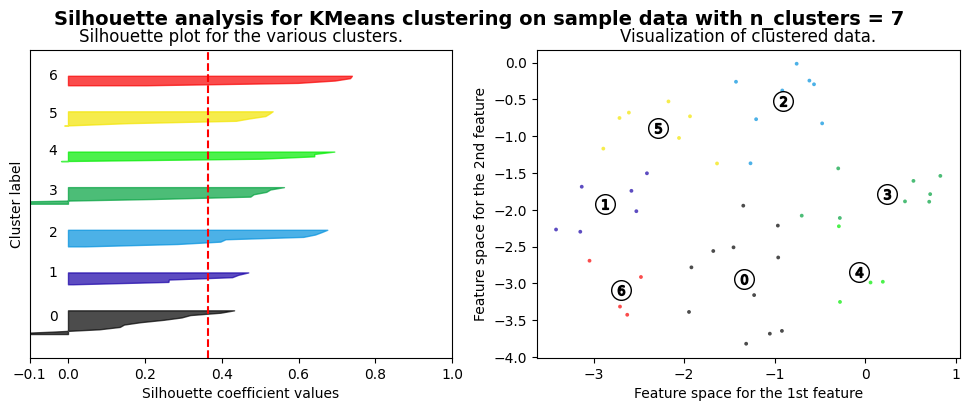

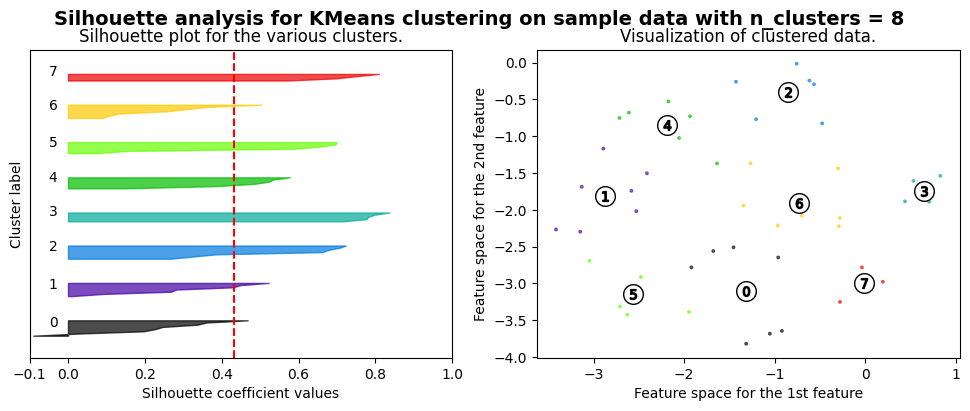

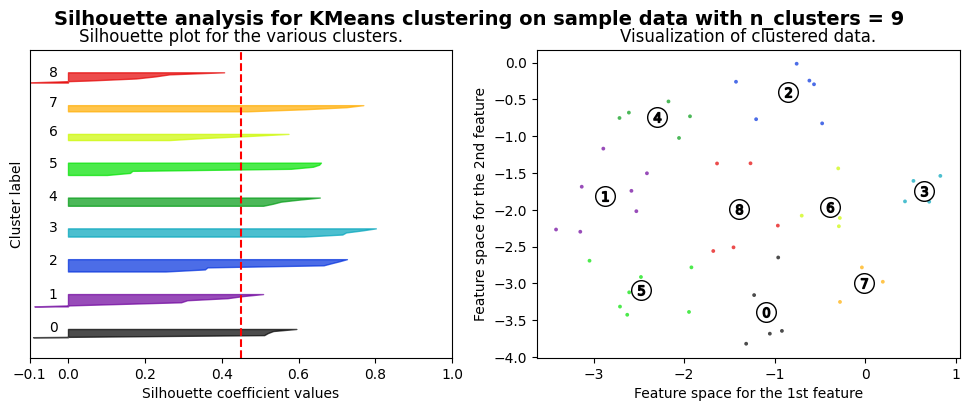

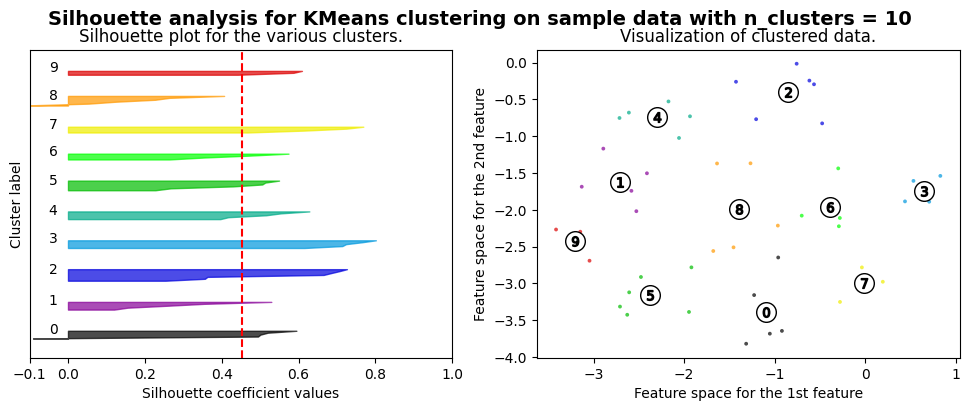

In [119]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X_tsne) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_tsne)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_tsne, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on TSNE data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    # plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

### Initialization & Metrics

In [120]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
cluster_labels_tsne = kmeans.fit_predict(X_tsne)

In [121]:
silhouette_avg = silhouette_score(X_tsne, cluster_labels_tsne)
print(f"For n_clusters = {4}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 4, the average silhouette score is: 0.4529574513435364


In [122]:
ch_score = calinski_harabasz_score(X_tsne, cluster_labels_tsne)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 66.13910615153458


In [123]:
db_score = davies_bouldin_score(X_tsne, cluster_labels_tsne)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.6620436259704917


### Visualing

In [124]:
df_tsne = df.copy()

In [125]:
df_tsne['Cluster'] = cluster_labels_tsne

In [126]:
id_vars = df_tsne.columns.difference(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'])

In [127]:
# Melt dataframe
tsne_graphs = pd.melt(df_tsne, id_vars=id_vars, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],value_name='tone')
tsne_graphs.drop('variable',axis=1, inplace=True)

In [128]:
tsne_graphs.head(2)

,Cluster,age,disability,education,employment,ethnicity,gender,income,language,marital_status,race,states,tone
0,2,45-54,i do not have a disability,High School,Employed Part time,non hispanic,female,"$25,000 - $49,999",both,na,native american,indiana,Persuasive
1,1,18-24,i do not have a disability,High School,Employed Part time,hispanic,male,"Less than $25,000",english,single,white,illinois,Original


In [129]:
tsne_graphs.to_excel('../datasets/tsne-tones-clusters.xlsx', index=False)

## UMAP

In [130]:
umap_model = umap.UMAP(n_components=2)  # Reduce to 2 dimensions
X_umap = umap_model.fit_transform(tones_encoded)

### Silhouette Score

For n_clusters = 2, the average silhouette score is: 0.3512246608734131
For n_clusters = 3, the average silhouette score is: 0.4226226508617401
For n_clusters = 4, the average silhouette score is: 0.39614877104759216
For n_clusters = 5, the average silhouette score is: 0.3624729514122009
For n_clusters = 6, the average silhouette score is: 0.37150493264198303
For n_clusters = 7, the average silhouette score is: 0.3807905316352844
For n_clusters = 8, the average silhouette score is: 0.385024756193161
For n_clusters = 9, the average silhouette score is: 0.3711862862110138
For n_clusters = 10, the average silhouette score is: 0.37838706374168396


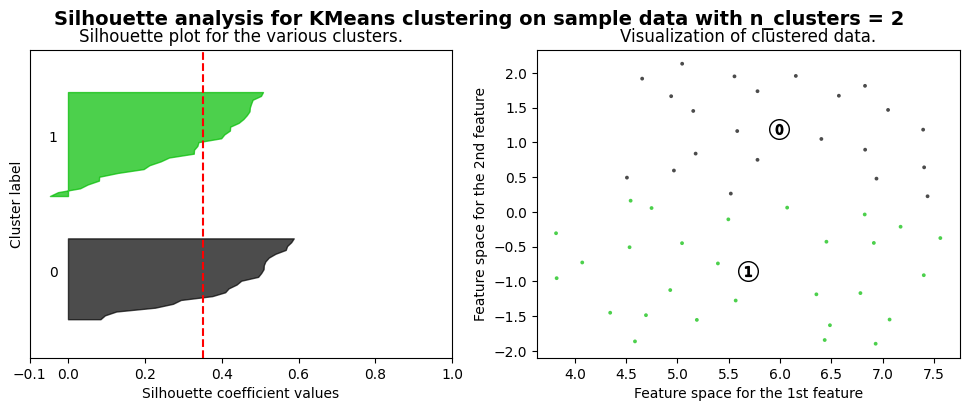

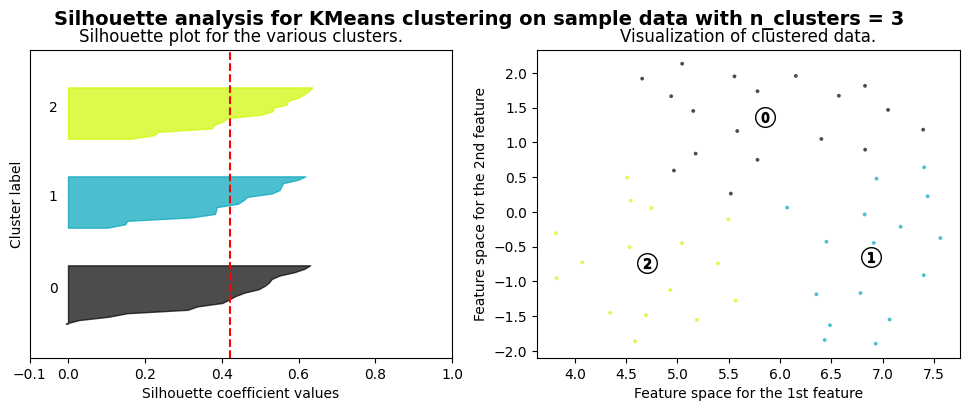

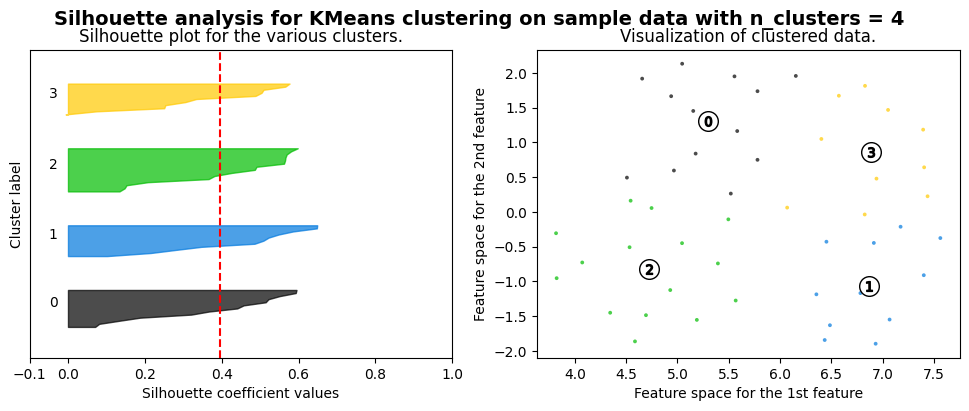

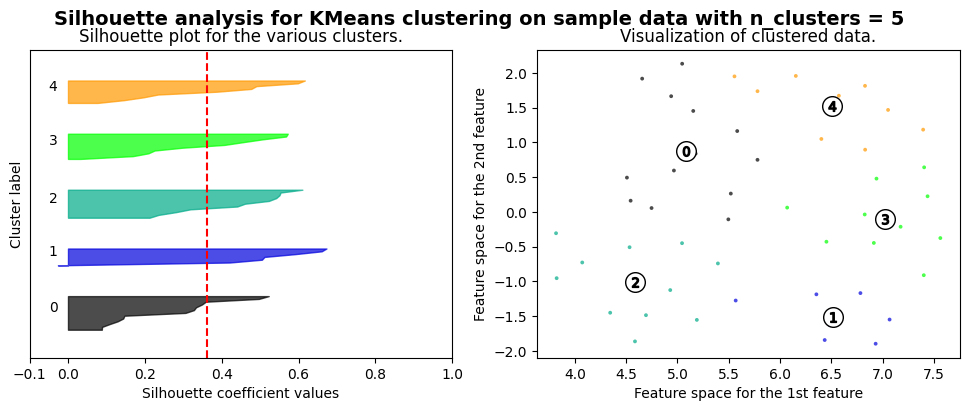

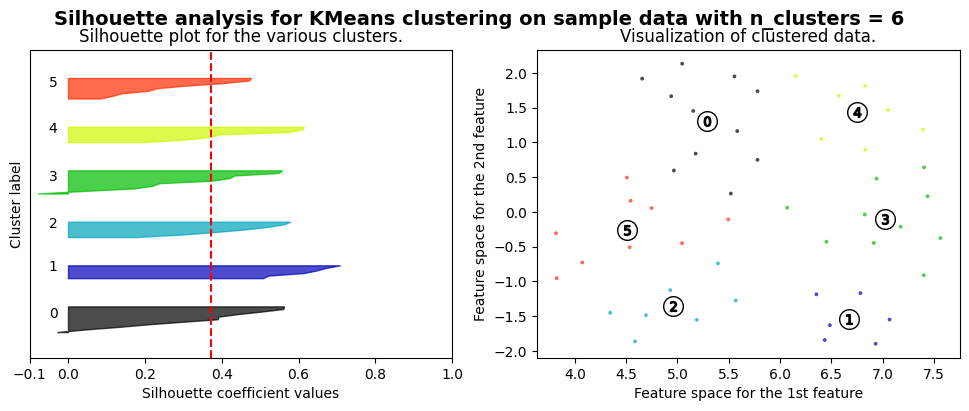

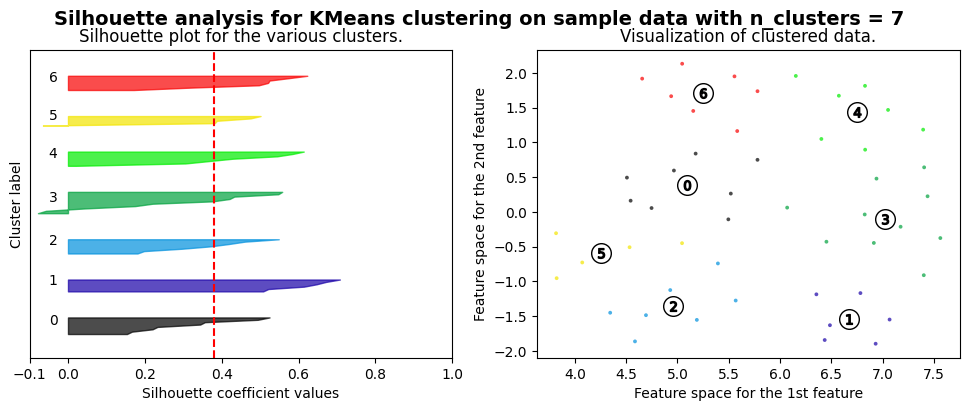

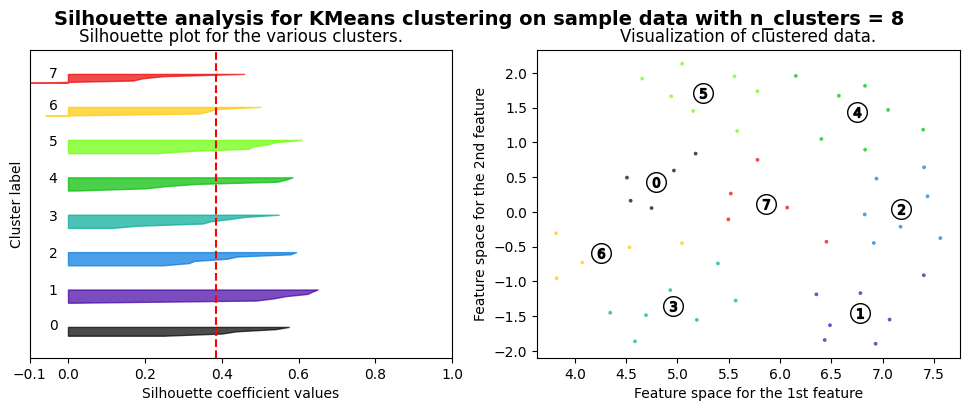

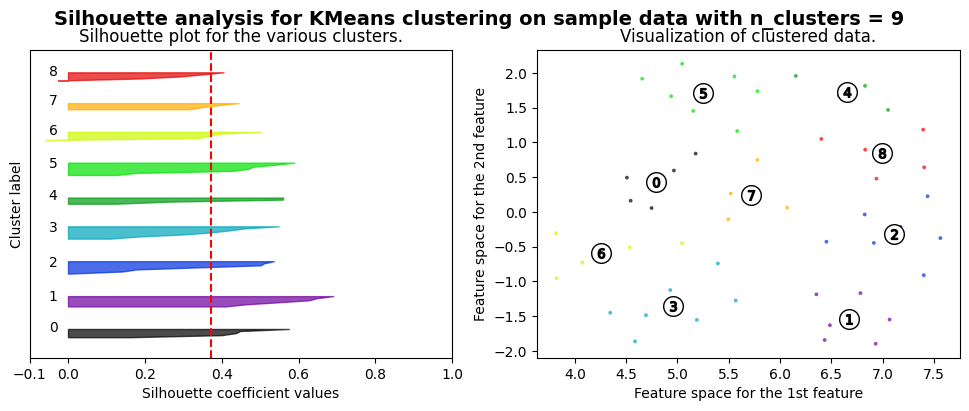

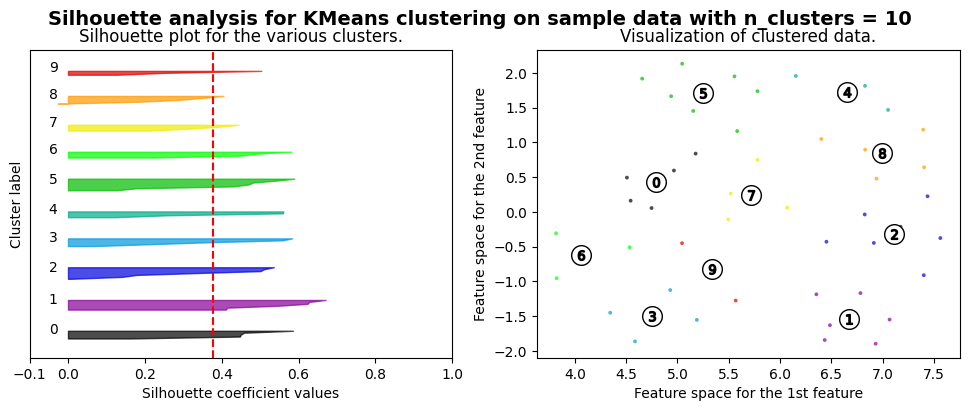

In [131]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X_umap) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_umap)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_umap, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_umap, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_umap[:, 0], X_umap[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    # plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

### Initialization & Metrics

In [132]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels_umap = kmeans.fit_predict(X_umap)

In [133]:
silhouette_avg = silhouette_score(X_umap, cluster_labels_umap)
print(f"For n_clusters = {4}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 4, the average silhouette score is: 0.4226226508617401


In [134]:
ch_score = calinski_harabasz_score(X_umap, cluster_labels_umap)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 49.267704691277764


In [135]:
db_score = davies_bouldin_score(X_umap, cluster_labels_umap)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.7705900774736992


In [136]:
df_umap = df.copy()

In [137]:
df_umap['Cluster'] = cluster_labels_umap

In [138]:
id_vars = df_umap.columns.difference(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'])

In [139]:
# Melt dataframe
umap_graphs = pd.melt(df_umap, id_vars=id_vars, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],value_name='tone')
umap_graphs.drop('variable',axis=1, inplace=True)

In [140]:
umap_graphs.to_excel('../datasets/umap-tones-clusters.xlsx', index=False)

## Isomap

In [141]:
isomap = Isomap(n_components=2, n_neighbors=2)  # Reduce to 2 dimensions
X_isomap = isomap.fit_transform(tones_encoded)

For n_clusters = 2, the average silhouette score is: 0.5429946530571633
For n_clusters = 3, the average silhouette score is: 0.45124540510386146
For n_clusters = 4, the average silhouette score is: 0.46619008949250806
For n_clusters = 5, the average silhouette score is: 0.40797006539272457
For n_clusters = 6, the average silhouette score is: 0.40454899738023514
For n_clusters = 7, the average silhouette score is: 0.38213578981180396


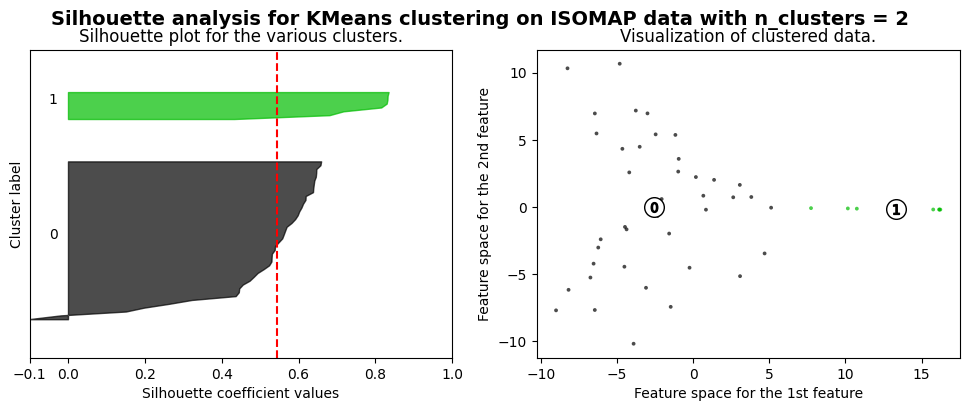

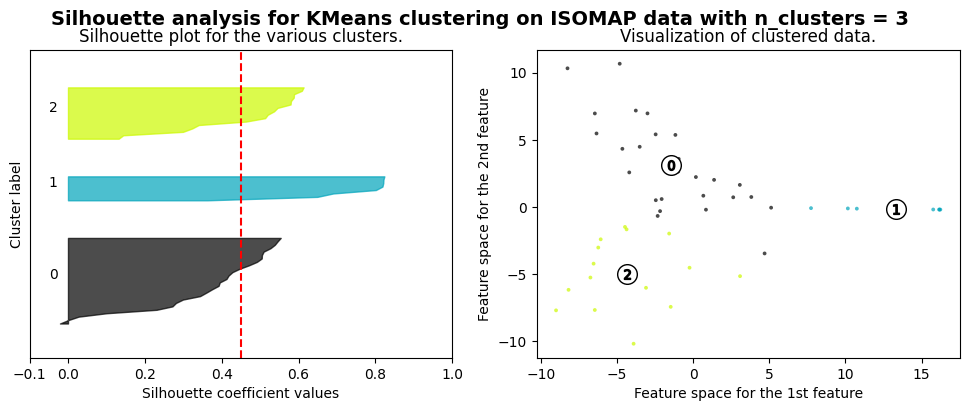

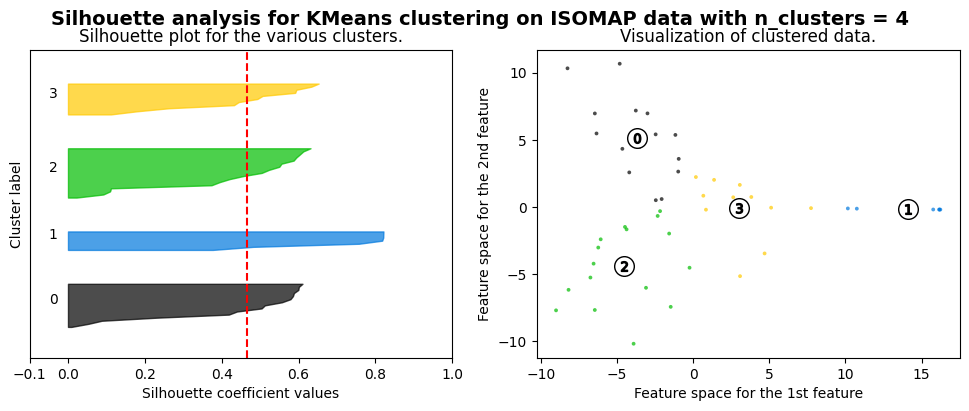

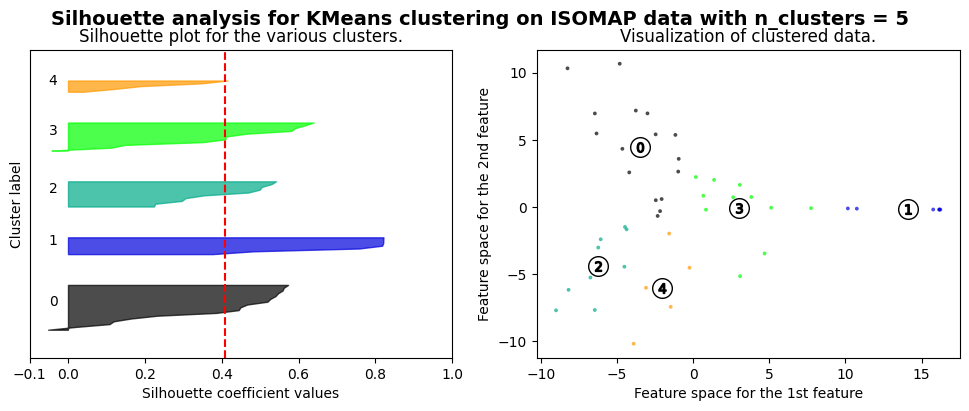

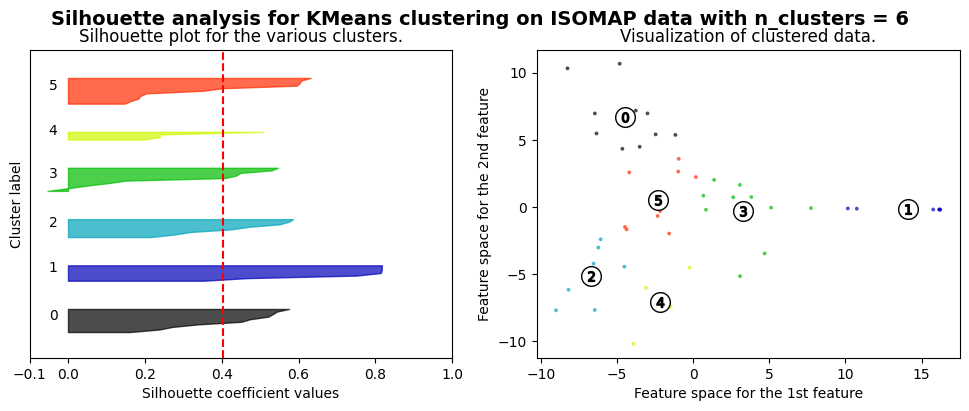

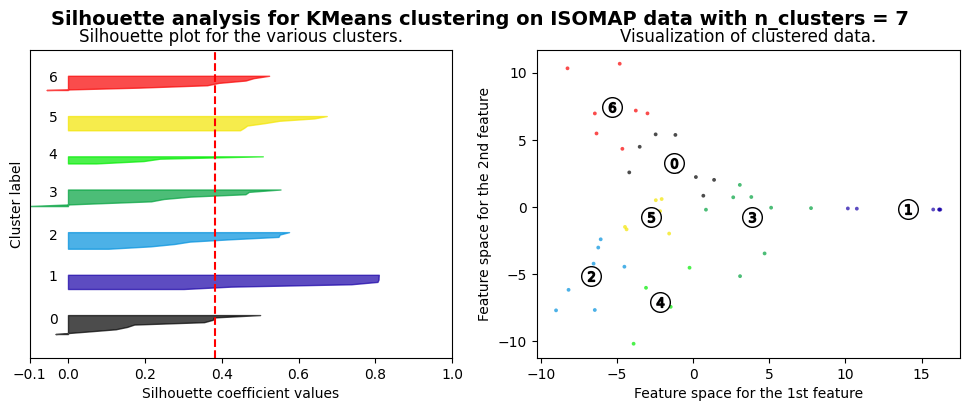

In [147]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5,6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X_isomap) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_isomap)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_isomap, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_isomap, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_isomap[:, 0], X_isomap[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on ISOMAP data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    # plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

### Initialization

In [169]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
cluster_labels_iso = kmeans.fit_predict(X_isomap)

In [170]:
silhouette_avg = silhouette_score(X_isomap, cluster_labels_iso)
print(f"For n_clusters = {4}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 4, the average silhouette score is: 0.46619008949250806


In [171]:
ch_score = calinski_harabasz_score(X_isomap, cluster_labels_iso)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 75.10045245406484


In [172]:
db_score = davies_bouldin_score(X_isomap, cluster_labels_iso)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.6392431913872916


In [173]:
df_iso = df.copy()

In [174]:
df_iso['Cluster'] = cluster_labels_iso

In [175]:
id_vars = df_iso.columns.difference(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'])

In [176]:
# Melt dataframe
iso_graphs = pd.melt(df_iso, id_vars=id_vars, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],value_name='tone')
iso_graphs.drop('variable',axis=1, inplace=True)

In [177]:
iso_graphs.head(3)

,Cluster,age,disability,education,employment,ethnicity,gender,income,language,marital_status,race,states,tone
0,0,45-54,i do not have a disability,High School,Employed Part time,non hispanic,female,"$25,000 - $49,999",both,na,native american,indiana,Persuasive
1,2,18-24,i do not have a disability,High School,Employed Part time,hispanic,male,"Less than $25,000",english,single,white,illinois,Original
2,3,25-34,i do not have a disability,Associate,Student,non hispanic,female,"Less than $25,000",english,single,multiracial,new York,Original


In [178]:
# List of columns to plot
columns_to_plot = ['age', 'disability', 'education', 'employment', 'ethnicity', 'gender', 'income', 'language', 'marital_status', 'race', 'tone']

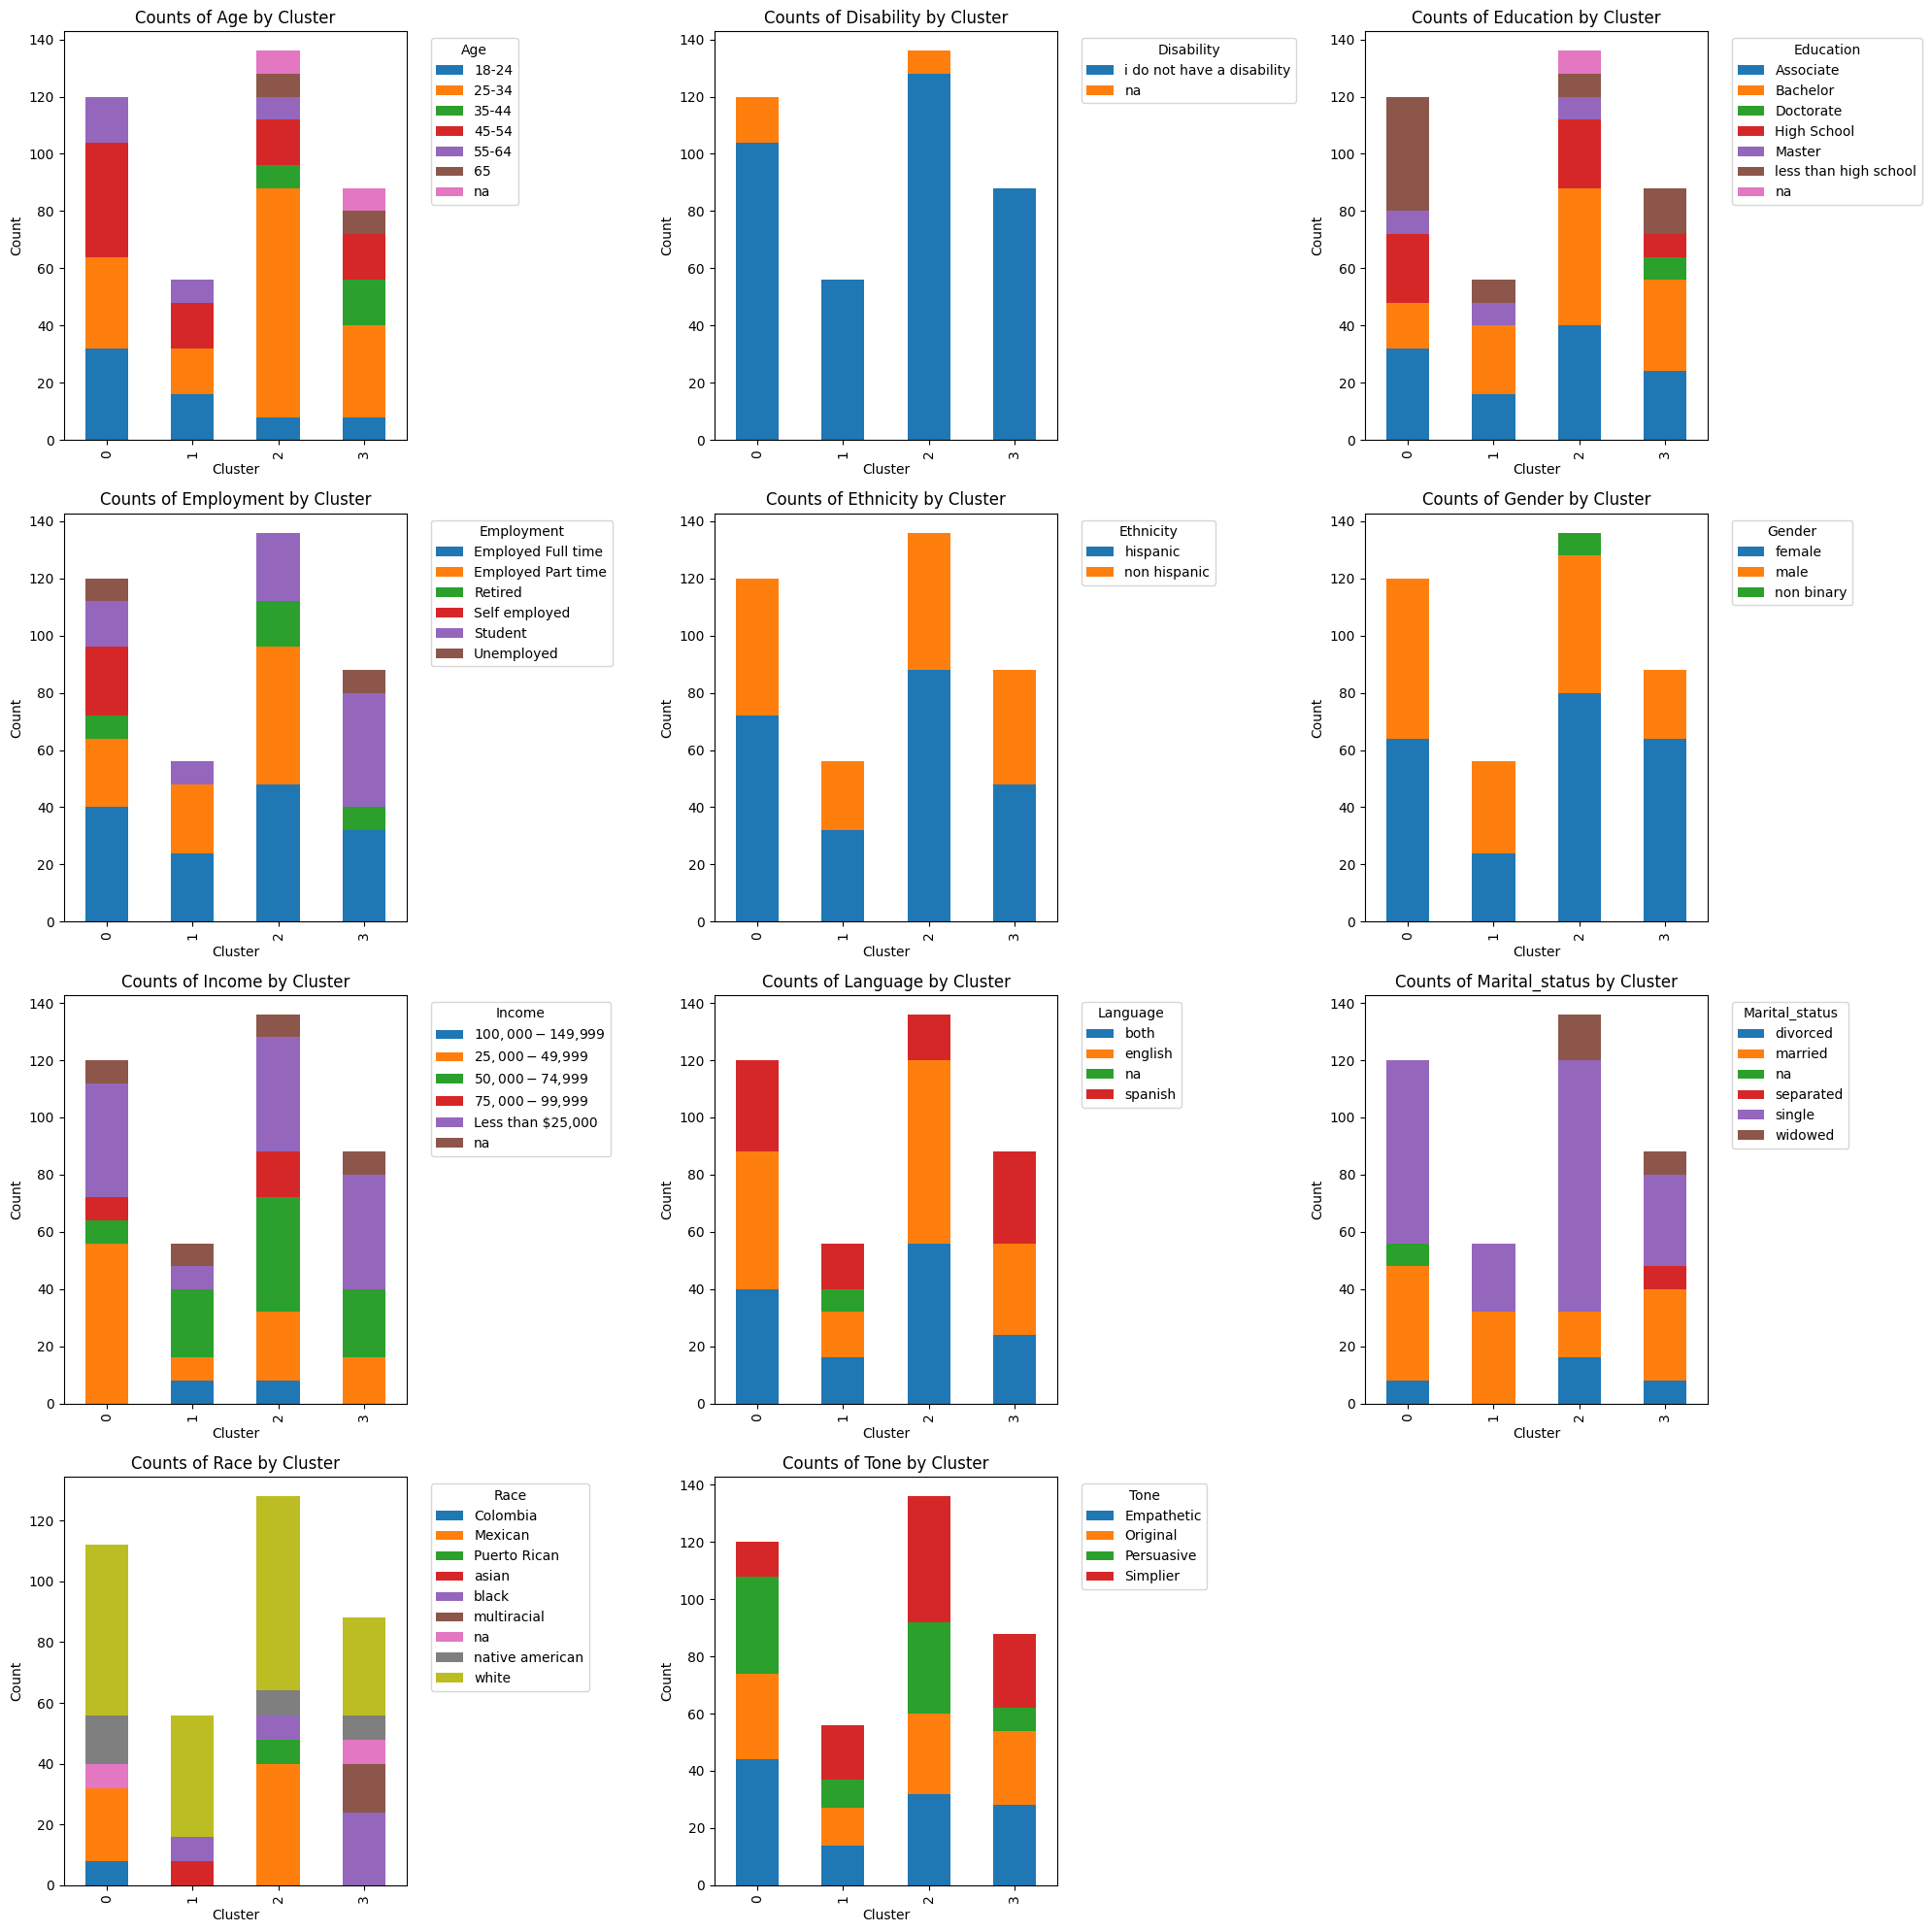

In [179]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    cluster_option_counts = iso_graphs.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = cluster_option_counts.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of {column.capitalize()} by Cluster')
    ax.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()